In [83]:
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
import matplotlib.pyplot as plt
#import mpld3
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
tf.reset_default_graph()

In [84]:
def shiftVector(rowV,n):
    t=[]
    for i in range(0,n,1):
        pre_zeros = np.zeros([1,i])
        post_zeros = np.zeros([1,n-i-1])
        t_row = np.append(pre_zeros,rowV)
        t_row = [np.append(t_row,post_zeros)]
        if i == 0:
            t = t_row
        else:
            t = np.append(t,t_row,axis=0)
    return t

In [85]:
tx = np.arange(0,10*3.14159,0.01)
ty = np.arange(1,10*3.14159+1,0.01)
trainX = np.sin(tx)
trainY = np.sin(ty)

In [86]:
x_size = 50
trainX = shiftVector(trainX,x_size)
trainX = trainX.T
#print(trainX[0:10])

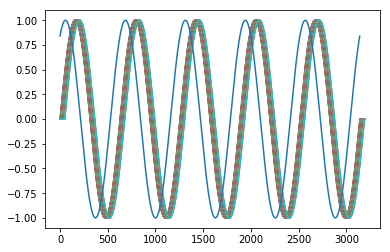

In [88]:
plt.plot(trainX)
plt.plot(trainY)
plt.show()
#print(trainX)

In [89]:
trainY = np.append(trainY,np.zeros([1,x_size-1]))
print(trainY)

[0.84147098 0.84683184 0.85210802 ... 0.         0.         0.        ]


In [90]:
nrow = round(0.8*trainX.shape[0])

In [91]:
train_x = trainX[:nrow, :]
test_x = trainX[nrow:,:]

In [92]:
train_y=trainY[:nrow]
test_y=trainY[nrow:]

In [93]:
C_size = 20  #num_units
h_size = 10
b_size = 5  #batch_size
n_classes=1
time_steps=x_size
#lstm_cell = tf.contrib.rnn.BasicLSTMCell(C_size)
lstm_cell=rnn.BasicLSTMCell(C_size)
#context = tf.zeros([b_size,C_size]),tf.zeros([b_size,h_size])
x = tf.placeholder("float", [b_size,time_steps,1])
y = tf.placeholder("float", shape=[b_size,n_classes])
v = tf.Variable(tf.random_uniform([C_size,n_classes]))
input= tf.unstack(x ,axis=1)
d ,_= rnn.static_rnn(lstm_cell,input,dtype="float32")
y_hat = tf.matmul(d[-1],v)

cost = tf.reduce_mean((y-y_hat)*(y-y_hat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [94]:
def next_batch():
    
 
    #np.random.shuffle(idx)
    trainx = train_x[(i*b_size):((i*b_size)+b_size),0:time_steps]
    trainx=trainx.reshape(b_size,time_steps,1)
    trainy=train_y[(i*b_size):((i*b_size)+b_size)]
    trainy=trainy.reshape(b_size,n_classes)

    return trainx,trainy

In [95]:
def next_batch_1():
    
 
    #np.random.shuffle(idx)
    trainx = test_x[(i*b_size):((i*b_size)+b_size),0:time_steps]
    trainx=trainx.reshape(b_size,time_steps,1)
   # trainy=train_y[(i*b_size):((i*b_size)+b_size)]
    #trainy=trainy.reshape(b_size,n_classes)

    return trainx#,trainy

In [96]:
y_last = np.zeros([1,len(train_y)])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(int(len(train_y)/b_size)):
            batch_x,batch_y=next_batch()
            sess.run(optimizer,feed_dict = {x:batch_x, y:batch_y})
            y_last[0][(i*b_size):((i*b_size)+b_size)] = sess.run([y_hat], feed_dict={x:batch_x})[0][0][0]
    y_last_1 = np.zeros([1,len(test_y)])
#with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    
    for i in range(int(len(test_y)/b_size)):
            batch_x=next_batch_1()
            sess.run(y_hat,feed_dict = {x:batch_x})
            y_last_1[0][(i*b_size):((i*b_size)+b_size)] = sess.run([y_hat], feed_dict={x:batch_x})[0][0][0]
            #y_last[(i*20):((i*20)+20)]=y_hat[0:20]
            #y_last[(i*20):((i*20)+20)]=y_hat[0:20]

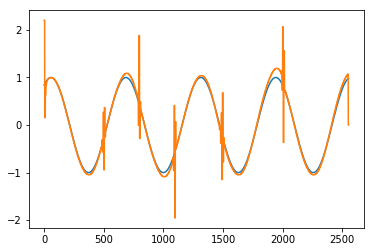

In [97]:
plt.plot(train_y)
plt.plot(y_last[0])
plt.show()

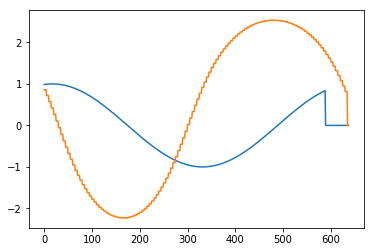

In [98]:
plt.plot(test_y)
plt.plot(y_last_1[0])
plt.show()